[배경] 
유전체 염기서열에서 획득한 유전체 변이 정보인 Single Nucleotide Polymorphism 정보는 특정 개체 및 특정 품종에 따라 다른 변이 양상을 나타낼 수 있기 때문에 동일개체를 확인하거나,

동일 품종을 구분하는데 활용이 가능합니다. 따라서 이번 경진대회에서는 개체 정보와 SNP 정보를 이용하여 A, B, C 품종을 분류하는 최고의 품종구분 정확도를 획득하는 것이 목표입니다.

농축수산 현장에서는 유전체 변이정보를 이용해서 품종을 구분하는 연구를 통해 품종의 다양성 혹은 품종 부정유통을 방지하기 위해 많이 활용하게 됩니다.



[주제]
개체와 SNP 정보를 이용하여 품종 분류 AI 모델 개발



[설명]
시장에서 세 품종이 동시에 유통될 때, 각 품종의 고유한 생산품목(우유 및 식육)의 가치 및 가격 산정에 부정유통이 차단되기 위해 현장에서 사용 할 수 있는 AI 모델이 필요합니다.

즉, 많은 SNP 정보를 통해 분류하는 것보다, 보다 더 적은 SNP 정보로 높은 분류 성능을 내는 것이 중요합니다.

따라서 이번 경진대회에서는 개체 정보와 사전에 구성된 15개의 SNP 정보를 바탕으로 품종 분류 모델을 개발해야 합니다.

In [77]:
# Data : https://dacon.io/competitions/official/236035/overview/description
# sample_submission, test, train 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("sample_submission.csv")
df_train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [79]:
df_test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [80]:
df_sub.head()

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A


## EDA

In [81]:
# class가 타겟임
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [82]:
df_train.apply(lambda x : x.unique())

id        [TRAIN_000, TRAIN_001, TRAIN_002, TRAIN_003, T...
father                                                  [0]
mother                                                  [0]
gender                                                  [0]
trait                                                [2, 1]
SNP_01                                      [G G, A G, A A]
SNP_02                                      [A G, G G, A A]
SNP_03                                      [A A, C A, C C]
SNP_04                                      [G A, A A, G G]
SNP_05                                      [C A, A A, C C]
SNP_06                                      [A A, A G, G G]
SNP_07                                      [A A, G G, G A]
SNP_08                                      [G G, G A, A A]
SNP_09                                      [A A, G A, G G]
SNP_10                                      [G G, A G, A A]
SNP_11                                      [A G, A A, G G]
SNP_12                                  

In [83]:
# SNP가 중복되는 문자들이 있기에, 문자형 숫자로 통일시켜줄 필요가 있음
df_snp = df_train.loc[:,"SNP_01":"SNP_15"]
values_set = set(df_snp.values.flatten().tolist())
vlist = list(values_set)
dict_values = {}
for i in range(len(vlist)):
    dict_values[vlist[i]] = i
dict_values

{'G G': 0, 'C A': 1, 'C C': 2, 'G A': 3, 'A G': 4, 'A A': 5}

In [84]:
from sklearn.preprocessing import LabelEncoder

map_cols = []
for i in range(1, 16):
    map_cols.append(f"SNP_{i:02}")

df_train_map = df_train[map_cols].apply(lambda x : x.map(dict_values))
df_train_map.index = df_train.index
df_train[map_cols] = df_train_map

df_test_map = df_test[map_cols].apply(lambda x : x.map(dict_values))
df_test_map.index = df_test.index
df_test[map_cols] = df_test_map

df_train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,0,4,5,3,1,...,5,0,5,0,4,5,5,5,5,B
1,TRAIN_001,0,0,0,2,4,4,1,5,5,...,5,3,5,4,5,3,0,5,5,C
2,TRAIN_002,0,0,0,2,0,0,5,3,2,...,5,3,3,4,5,5,5,5,5,B
3,TRAIN_003,0,0,0,1,5,0,5,3,5,...,0,5,0,4,0,0,0,5,0,A
4,TRAIN_004,0,0,0,2,0,0,2,5,2,...,5,5,5,0,5,5,4,5,3,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,4,4,5,3,2,...,5,3,5,0,4,3,5,5,5,B
258,TRAIN_258,0,0,0,2,0,5,1,5,5,...,3,3,5,4,4,5,4,5,3,C
259,TRAIN_259,0,0,0,1,4,0,5,3,5,...,0,3,3,5,0,0,0,1,0,A
260,TRAIN_260,0,0,0,1,5,0,5,3,5,...,0,5,3,4,4,3,0,1,0,A


In [88]:
df_train_drop = df_train.drop(["id"], axis=1)
cls_map = {"A" : 1, "B" : 2, "C" : 3}
df_train_drop["class"] = df_train_drop["class"].map(cls_map)

df_test_drop = df_test.drop(["id"], axis=1)


C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

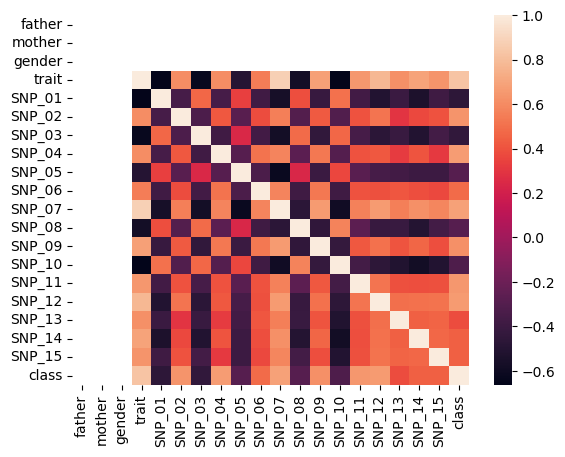

In [89]:
corr = df_train_drop.corr()
sns.heatmap(corr, annot=True)

In [90]:
corr["class"].abs().sort_values(ascending=False)

class     1.000000
trait     0.826978
SNP_07    0.684056
SNP_04    0.664128
SNP_12    0.656434
SNP_11    0.647284
SNP_02    0.634374
SNP_09    0.621670
SNP_06    0.485918
SNP_01    0.466980
SNP_03    0.447594
SNP_15    0.441427
SNP_14    0.441211
SNP_13    0.382104
SNP_10    0.323948
SNP_05    0.292167
SNP_08    0.289382
father         NaN
mother         NaN
gender         NaN
Name: class, dtype: float64

In [91]:
# father, mother drop
df_train_drop = df_train_drop.drop(["father", "mother", "gender"], axis=1)
df_train_drop.head()

# father, mother drop
df_test_drop = df_test_drop.drop(["father", "mother", "gender"], axis=1)
df_test_drop.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,1,4,0,5,3,5,4,0,3,3,4,4,3,0,1,3
1,2,0,4,2,0,2,5,5,5,5,0,4,5,5,5,5
2,2,0,4,5,5,1,4,5,5,5,4,5,3,0,5,0
3,2,0,4,1,5,2,5,5,5,5,0,5,3,4,5,5
4,1,5,0,5,0,5,0,0,5,0,4,0,3,0,5,0


## 학습 및 분할

In [92]:
df_train_drop.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,2,0,4,5,3,1,5,5,0,5,0,4,5,5,5,5,2
1,2,4,4,1,5,5,4,5,3,5,4,5,3,0,5,5,3
2,2,0,0,5,3,2,0,5,3,3,4,5,5,5,5,5,2
3,1,5,0,5,3,5,0,0,5,0,4,0,0,0,5,0,1
4,2,0,0,2,5,2,5,5,5,5,0,5,5,4,5,3,3


In [93]:
df_test_drop.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,1,4,0,5,3,5,4,0,3,3,4,4,3,0,1,3
1,2,0,4,2,0,2,5,5,5,5,0,4,5,5,5,5
2,2,0,4,5,5,1,4,5,5,5,4,5,3,0,5,0
3,2,0,4,1,5,2,5,5,5,5,0,5,3,4,5,5
4,1,5,0,5,0,5,0,0,5,0,4,0,3,0,5,0


In [94]:
from sklearn.model_selection import train_test_split
x = df_train_drop.drop(["class"], axis=1)
y = df_train_drop[["class"]]

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_val))

209 53


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score

In [96]:
gb = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)

C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [100]:
y_predict = gb.predict(X_val)

print(accuracy_score(y_val, y_predict))
print(f1_score(y_val, y_predict, average='macro'))

0.9811320754716981
0.9824915824915825


In [103]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [106]:
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [2, 3, 4],
    'max_features': [None, "sqrt", "log2"],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}
cv = RandomizedSearchCV(
    gb,
    param_distributions=params,
    cv=5,
    n_iter=100
)

cv.fit(X_train, y_train)

C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsh\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [2, 3, 4],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [107]:
print(cv.best_estimator_)
print(cv.best_params_)
print(cv.best_score_)

y_pred = cv.predict(X_val)
print(accuracy_score(y_val, y_pred))

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, max_features='sqrt',
                           min_samples_leaf=10, random_state=42)
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}
0.9475029036004645
0.9622641509433962


In [109]:
df_test_drop

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,1,4,0,5,3,5,4,0,3,3,4,4,3,0,1,3
1,2,0,4,2,0,2,5,5,5,5,0,4,5,5,5,5
2,2,0,4,5,5,1,4,5,5,5,4,5,3,0,5,0
3,2,0,4,1,5,2,5,5,5,5,0,5,3,4,5,5
4,1,5,0,5,0,5,0,0,5,0,4,0,3,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2,4,0,2,5,1,4,5,0,5,0,0,5,5,5,3
171,2,0,5,5,5,1,4,5,5,5,4,5,5,4,5,3
172,2,0,5,5,5,1,4,5,5,5,0,4,5,4,5,0
173,2,4,0,1,3,2,0,5,3,5,0,4,5,5,5,5


In [110]:
df_test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,4,0,5,3,5,4,0,3,3,4,4,3,0,1,3
1,TEST_001,0,0,0,2,0,4,2,0,2,5,5,5,5,0,4,5,5,5,5
2,TEST_002,0,0,0,2,0,4,5,5,1,4,5,5,5,4,5,3,0,5,0
3,TEST_003,0,0,0,2,0,4,1,5,2,5,5,5,5,0,5,3,4,5,5
4,TEST_004,0,0,0,1,5,0,5,0,5,0,0,5,0,4,0,3,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,4,0,2,5,1,4,5,0,5,0,0,5,5,5,3
171,TEST_171,0,0,0,2,0,5,5,5,1,4,5,5,5,4,5,5,4,5,3
172,TEST_172,0,0,0,2,0,5,5,5,1,4,5,5,5,0,4,5,4,5,0
173,TEST_173,0,0,0,2,4,0,1,3,2,0,5,3,5,0,4,5,5,5,5


In [111]:
df_sub

,id,class
0,TEST_000,A
1,TEST_001,A
2,TEST_002,A
3,TEST_003,A
4,TEST_004,A
...,...,...
170,TEST_170,A
171,TEST_171,A
172,TEST_172,A
173,TEST_173,A


In [118]:
y_pred = cv.predict(df_test_drop)
y_pred

array([1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 3, 1, 2, 3, 2, 2, 3, 1, 2, 3, 2,
       2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 2, 3, 1, 2, 3, 1, 2, 3, 3, 3, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 3, 1, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 3, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 3, 1, 2, 3, 2, 2, 1, 1, 3, 2, 2, 1, 2, 3, 3, 2, 2],
      dtype=int64)

In [119]:
cls_map

{'A': 1, 'B': 2, 'C': 3}

In [120]:
reverse_map = {value : key for key, value in cls_map.items()}
reverse_map

{1: 'A', 2: 'B', 3: 'C'}

In [125]:
df_cls = pd.DataFrame(y_pred, columns=["class"])
df_cls.index = df_test_drop.index
df_cls["class"] = df_cls["class"].map(reverse_map)
df_cls["class"]

0      A
1      B
2      C
3      B
4      A
      ..
170    B
171    C
172    C
173    B
174    B
Name: class, Length: 175, dtype: object

In [127]:
df_sub["class"] = df_cls["class"]

In [131]:
df_sub.isnull().sum()

id       0
class    0
dtype: int64

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [133]:
df_sub.to_csv('sample_submission.csv', index=False)